In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class add_graph:
  def __init__(self):
    pass
  def forward(self, x, y):
    out = x + y
    return out
  def backward(self, dout):
    dx = 1 * dout # x +y 를 미분 =>1
    dy = 1 * dout
    return dx, dy

In [9]:
class mul_graph:
  def __init__(self):
    self.x = None
    self.y = None
  def forward(self, x, y):
    self.x = x # 지역변수로 남기지 않고 나중에도 x,y 를 쓰기 위래 self변수에 저장
    self.y = y
    out = x * y
    return out
  def backward(self, dout):
    dx = self.y * dout
    dy = self.x * dout
    return dx, dy

In [40]:
class mse_graph:
  def __init__(self):
    self.loss= None
    self.y = None  #예측값
    self.t = None     #정답
    self.x  = None #입력값
  def forward(self, y, t):
    self.t= t
    self.y= y
    self.loss = np.square(self.t - self.y).sum()/ self.t.shape[0]   #에러제곱의 평균. 개수로 나눈거니까
    return self.loss
  def backward(self, x, dout=1):   #미분할거임
    data_size= self.t.shape[0]
    dweight_mse = ((self.y - self.t)*x).sum()*2/ data_size      #mse를 가중치에 대해 미분
    dbias_mse=   (self.y - self.t).sum()*2/ data_size           #mse를 bias에 대해 미분
    return dweight_mse, dbias_mse

In [11]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [12]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [13]:
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
print(total_price)

715.0000000000001


In [14]:
dprice = 1 # 맨 끝단에 줄 미분값이 없기 때문에 1을 부여
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)
print('dApple', dapple) # apple이 1 증가할 때 2.2 증가
print('dApple_num', dapple_num) # dapple_num 1 증가할 때 110 증가
print('dOrange', dorange)# dorange 1 증가할 때 3.3 증가
print('dOrange_num', dorange_num) # dorange_num 1 증가할 때 165 증가  => 각각의 노들을의 값이 결과값에 끼치는 영향의 크기

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [15]:
def celsius_to_fahrenheit(x):
  return x * 1.8 +32 

In [20]:
data_C = np.array(range(100)) # scaling 하는 이유 미분값이 너무 클 경우 발산할 가능성이 있기에
data_F = celsius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [41]:
weight = np.random.uniform(0, 5, 1) # 0 ~ 5 사이 값 1개
print(weight)
bias = 0

[4.73859544]


In [42]:
weight_graph = mul_graph() # 곱셈그래프 1개
bias_graph = add_graph() # 덧셈그래프 1개

In [52]:
weighted_data = weight_graph.forward(weight, scaled_data_C)  #섭씨 온도 scaled_data_C(100개)
predict_data = bias_graph.forward(weighted_data, bias)
# print(weighted_data)
print(predict_data)

[0.         0.04738595 0.09477191 0.14215786 0.18954382 0.23692977
 0.28431573 0.33170168 0.37908764 0.42647359 0.47385954 0.5212455
 0.56863145 0.61601741 0.66340336 0.71078932 0.75817527 0.80556123
 0.85294718 0.90033313 0.94771909 0.99510504 1.042491   1.08987695
 1.13726291 1.18464886 1.23203482 1.27942077 1.32680672 1.37419268
 1.42157863 1.46896459 1.51635054 1.5637365  1.61112245 1.65850841
 1.70589436 1.75328031 1.80066627 1.84805222 1.89543818 1.94282413
 1.99021009 2.03759604 2.08498199 2.13236795 2.1797539  2.22713986
 2.27452581 2.32191177 2.36929772 2.41668368 2.46406963 2.51145558
 2.55884154 2.60622749 2.65361345 2.7009994  2.74838536 2.79577131
 2.84315727 2.89054322 2.93792917 2.98531513 3.03270108 3.08008704
 3.12747299 3.17485895 3.2222449  3.26963086 3.31701681 3.36440276
 3.41178872 3.45917467 3.50656063 3.55394658 3.60133254 3.64871849
 3.69610445 3.7434904  3.79087635 3.83826231 3.88564826 3.93303422
 3.98042017 4.02780613 4.07519208 4.12257804 4.16996399 4.21734

In [44]:
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [45]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

2.0068678962157436


In [46]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)
  #mse의 weight에 대한 미분값. gradient는 기울기임

1.6129756274940295
2.2692094886844663


In [48]:
learning_rate = 0.1
learning_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print(learning_weight)
print(weight)

In [50]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print(learned_bias)
print(bias)

-0.22692094886844663
0


In [63]:
weight = np.random.uniform(0, 5, 1) # 0 ~ 5 사이 값 1개
bias = 0
dout = 1
learning_rate = 0.1
error_list = []
for i in range(1000):
  #forward
  weighted_data = weight_graph.forward(weight, scaled_data_C)  
  predict_data = bias_graph.forward(weighted_data, bias)
  #backward
  dout = 1
  dbias, dbiased_data = bias_graph.backward(dout)
  dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
  #mse
  mse = mseGraph.forward(predict_data, scaled_data_F)
  error_list.append(mse)
  weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
  #learning -> wight bias 수정
  weight = weight - learning_rate * weight_mse_gradient * np.average(dweight) # 원래값 - learning_rate *평균제곱오차의 미분값 * 원래값의 미분값
  bias = bias - learning_rate * bias_mse_gradient * dbias
print(weight)
print(bias)

[1.79993894]
0.32003137214543215


In [64]:
print(error_list[-1])

3.165675565918916e-10


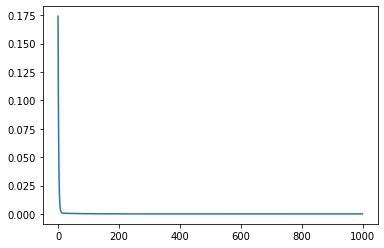

In [65]:
plt.plot(error_list)
plt.show()